<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
!تشخیص تقلب
</font>
</h1>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>

</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این قسمت کتاب‌خانه‌ها و ابزار مورد نیاز خود را <code>import</code> کنید و فایل داده‌ها را که در پوشه‌ی <code>Data</code> و که با نام‌های <code>train.csv</code> و <code>test.csv</code> ذخیره‌شده‌اند را بخوانید و وارد محیط کار خود کنید.
</font>
</p>

In [104]:
# TODO:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



In [105]:
data_train=pd.read_csv("/home/aerf123/my_projects/python/Data_analysis_and_science_and_ml/contest/in progress/fraud-detection!/Data/train.csv")
data_test=pd.read_csv("/home/aerf123/my_projects/python/Data_analysis_and_science_and_ml/contest/in progress/fraud-detection!/Data/test.csv")

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
        در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی دلخواهتان، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
    در این قسمت شما می‌توانید بخشی از داده‌ی موجود را برای اعتبارسنجی در نظر بگیرید.
</font>
</p>

In [106]:
print(data_train.columns)
data_train.head(5)


Index(['timestamp', 'user_id', 'processing_batch_id', 'transaction_amount',
       'user_age_days', 'ip_risk_score', 'transaction_speed_seconds',
       'product_category', 'payment_method', 'is_fraud'],
      dtype='object')


,timestamp,user_id,processing_batch_id,transaction_amount,user_age_days,ip_risk_score,transaction_speed_seconds,product_category,payment_method,is_fraud
0,29:50.2,104985,2113,4.27,392,30.01,17.73,subscription,credit_card,0
1,22:20.7,102534,2254,37.62,507,25.83,22.36,travel,debit_card,0
2,46:36.0,110534,2373,531.63,64,85.22,9.35,digital_service,credit_card,1
3,38:02.3,109236,2158,314.96,965,55.09,22.81,subscription,paypal,0
4,22:58.1,109706,2381,2300.59,45,94.31,4.67,digital_service,credit_card,1


In [ ]:
le=LabelEncoder()
for i in data_train.columns[data_train.dtypes == "object"]:
    data_train[i]=le.fit_transform(data_train[i])
    data_test[i]=le.transform(data_test[i])    

In [108]:
print(data_train.isna().sum())
print(data_train.duplicated().sum())
print(data_test.isna().sum())
data_test.duplicated().sum()

timestamp                    0
user_id                      0
processing_batch_id          0
transaction_amount           0
user_age_days                0
ip_risk_score                0
transaction_speed_seconds    0
product_category             0
payment_method               0
is_fraud                     0
dtype: int64
0
timestamp                    0
user_id                      0
processing_batch_id          0
transaction_amount           0
user_age_days                0
ip_risk_score                0
transaction_speed_seconds    0
product_category             0
payment_method               0
dtype: int64


np.int64(0)

In [109]:
# if "is_fraud" in data_train.columns:
#     y_target_train=data_train["is_fraud"]


# encoded_data_train=data_train.drop(columns="is_fraud")


# for i in data_train.columns[data_train.dtypes == "object"]:
#     encoded_data_train=pd.concat([data_train,pd.get_dummies(data_train[i],dtype=np.int8,drop_first=True)],axis=1)
#     encoded_data_train=encoded_data_train.drop(columns=[i])

data_train

,timestamp,user_id,processing_batch_id,transaction_amount,user_age_days,ip_risk_score,transaction_speed_seconds,product_category,payment_method,is_fraud
0,4188,104985,2113,4.27,392,30.01,17.73,3,0,0
1,3134,102534,2254,37.62,507,25.83,22.36,4,1,0
2,6548,110534,2373,531.63,64,85.22,9.35,1,0,1
3,5344,109236,2158,314.96,965,55.09,22.81,3,2,0
4,3220,109706,2381,2300.59,45,94.31,4.67,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9595,6910,105848,2353,18.18,579,68.71,18.31,3,0,0
9596,1888,104722,2328,14.98,15,19.19,20.50,1,0,0
9597,8093,102000,2129,27.36,931,54.98,16.88,1,1,0
9598,2790,102838,2331,126.54,196,61.25,17.08,0,2,0


<Axes: >

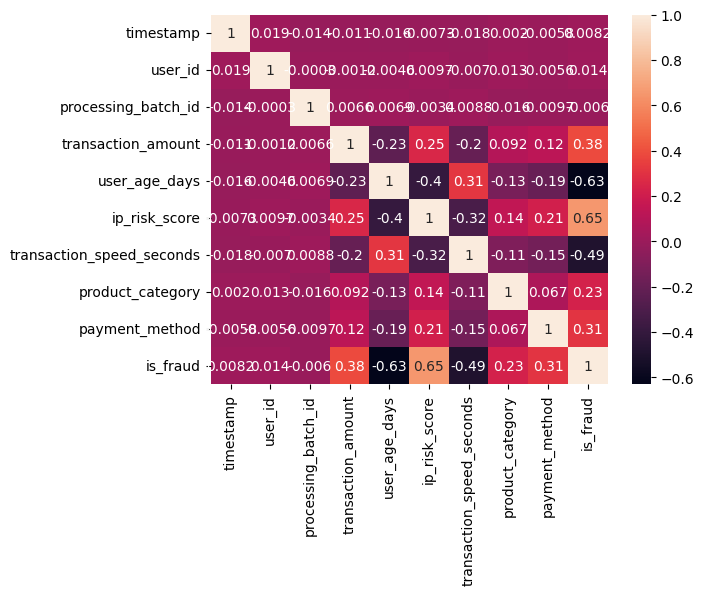

In [110]:
correlation=data_train.corr()
sns.heatmap(correlation,annot=True)

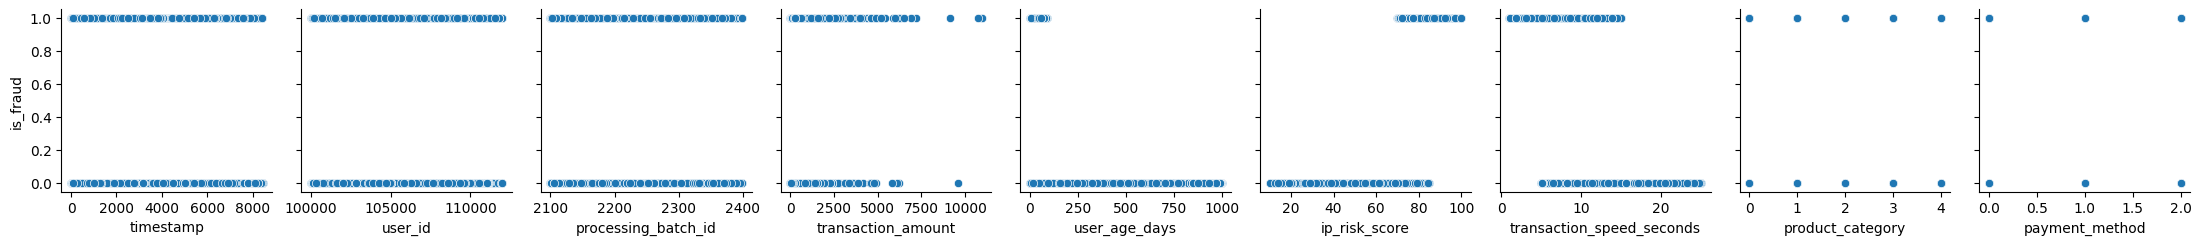

In [111]:
plot=sns.PairGrid(data_train,x_vars=data_train.iloc[:,:-1].columns,y_vars=['is_fraud'])
plot.map(sns.scatterplot)


In [112]:
# TODO:
x_features_train=data_train.iloc[:,3:-1] #with out first three columns
y_target_train=data_train.iloc[:,-1]
x_features_test=data_test.iloc[:,3:]



scaler=StandardScaler()
scaled_x_features_train=scaler.fit_transform(x_features_train)
scaled_x_features_test=scaler.transform(x_features_test)
scaled_x_features_train=pd.DataFrame(scaled_x_features_train)
scaled_x_features_test=pd.DataFrame(scaled_x_features_test)







<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>



In [113]:
x_train,x_val,y_train,y_val=train_test_split(scaled_x_features_train,y_target_train,random_state=42,test_size=0.25,stratify=y_target_train)
our_tree=tree.DecisionTreeClassifier(max_depth=100,random_state=42)
our_tree.fit(x_train,y_train)
print(our_tree.score(x_val,y_val))
print(x_features_test.columns)
our_tree.feature_importances_

0.99375
Index(['transaction_amount', 'user_age_days', 'ip_risk_score',
       'transaction_speed_seconds', 'product_category', 'payment_method'],
      dtype='object')


array([0.01097767, 0.72821273, 0.21962274, 0.03832242, 0.00158159,
       0.00128285])

In [114]:

x_train,x_val,y_train,y_val=train_test_split(scaled_x_features_train,y_target_train,random_state=42,test_size=0.25,stratify=y_target_train)
scv_classifier=SVC(random_state=42,C=0.1)
scv_classifier.fit(x_train,y_train)
y_hat=scv_classifier.predict(x_val)
print(scv_classifier.score(x_val,y_val))


0.9829166666666667


In [115]:
# TODO:

x_train, x_val, y_train, y_val = train_test_split(scaled_x_features_train, y_target_train,test_size=0.25, random_state=42, stratify=y_target_train)
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)
print(log_reg.score(x_val, y_val) )

0.98


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h2>



In [116]:
from sklearn.metrics import accuracy_score

# TODO:
y_hat=scv_classifier.predict(x_val)
print("for svc: ",accuracy_score(y_val,y_hat))

y_hat=log_reg.predict(x_val)
print("for logistic : ",accuracy_score(y_val,y_hat))

y_hat=our_tree.predict(x_val)
print("for tree: ",accuracy_score(y_val,y_hat))


for svc:  0.9829166666666667
for logistic :  0.98
for tree:  0.99375


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>


In [117]:
# TODO:
submission=pd.DataFrame()
submission["user_id"]=data_test.user_id
submission["is_fraud"] = our_tree.predict(scaled_x_features_test)
submission


,user_id,is_fraud
0,100811,1
1,104345,1
2,100383,0
3,111014,0
4,110828,0
...,...,...
2395,110834,0
2396,102130,1
2397,109608,0
2398,109950,0


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [119]:
import zipfile
import joblib
import os

if not os.path.exists(os.path.join(os.getcwd(), 'fraudy.ipynb')):
    %notebook -e fraudy.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['fraudy.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['fraudy.ipynb', 'submission.csv']
